In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

C:\Users\NIHIT\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
boston.data.shape

(506L, 13L)

In [5]:
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
print boston.target.shape

(506L,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


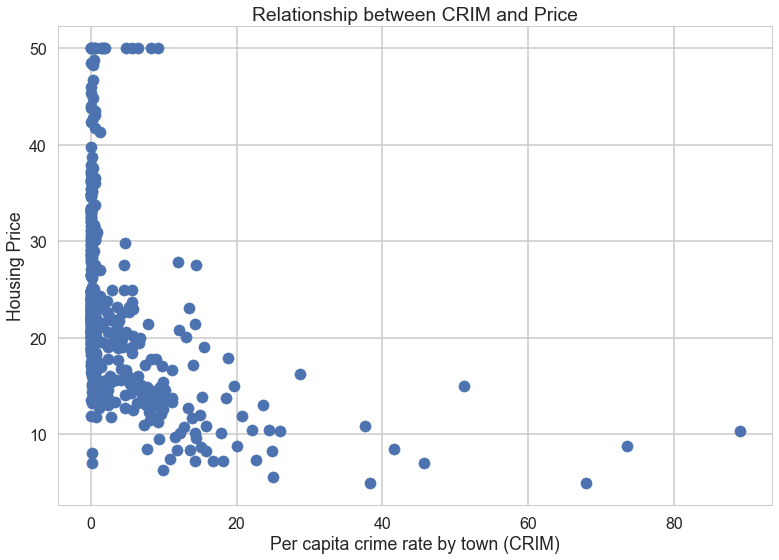

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

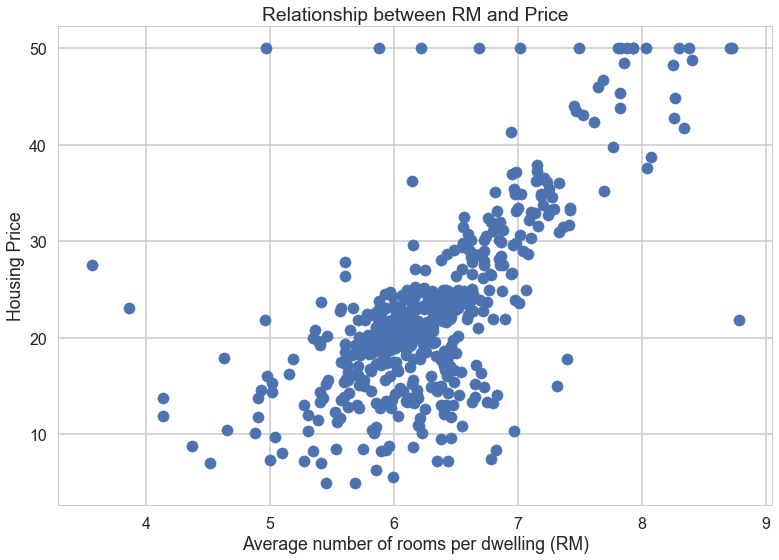

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

In [14]:
# We can also use seaborn regplot for thi
#  This provides automatic linear regression fits (useful for data exploration later on)

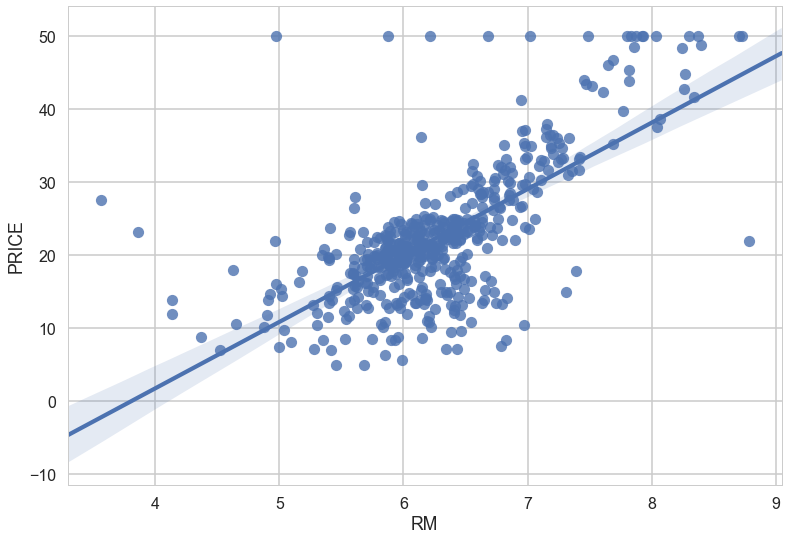

In [15]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

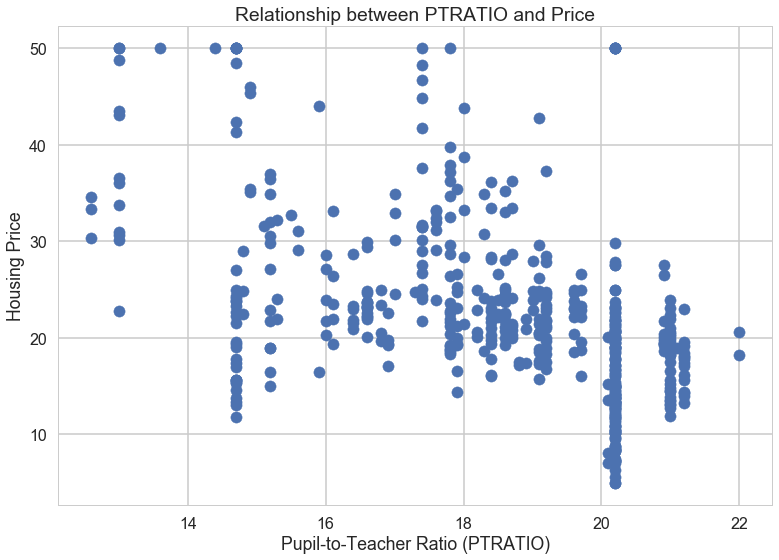

In [16]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

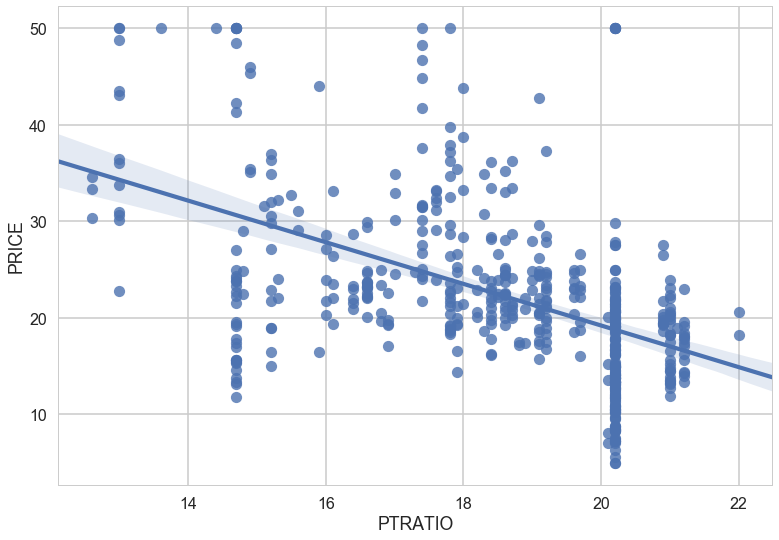

In [18]:
sns.regplot(x="PTRATIO", y="PRICE", data=bos, fit_reg = True)

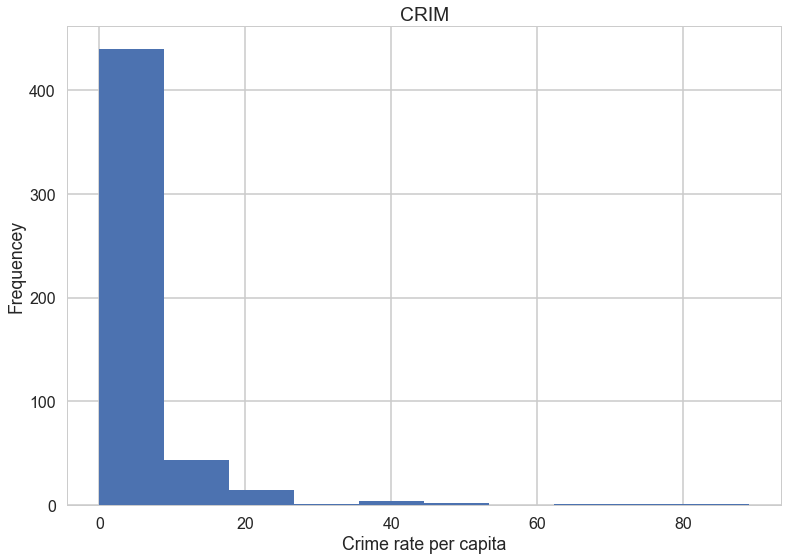

In [19]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

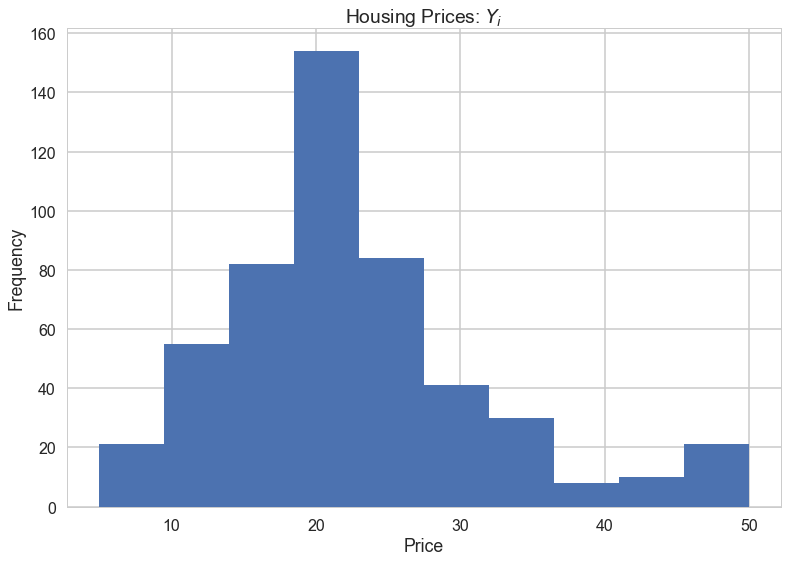

In [20]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Fitting Linear Regression using statsmodels

In [21]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 05 Oct 2017   Prob (F-statistic):           2.49e-74
Time:                        15:39:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

# interpreting Coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the RM coefficient (9.1021) by first noticing that the p-vale (under P>|t|) is so small, basically zero. We can interpret the coefficient as, if we compare two groups of towns, one where the average number of rooms is say $5$ and the other group is the same except that they all have $6$ rooms. For these two groups the average difference in house prives is about $9.1$ (in thousands) so about $\$9,100$ difference. The confidence interval fives us a range of plausible values for this difference, about ($\$8,279, \$9,925$), deffinitely not chump change.

The formula gives instruction for a general structure for a regression call. For statsmodels (ols or logit) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (Outcome, X1,X2, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:                                                    
Outcome ~ X1                                                                                                                           
But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:            
Outcome ~ X1 + X2 + X3

Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines.

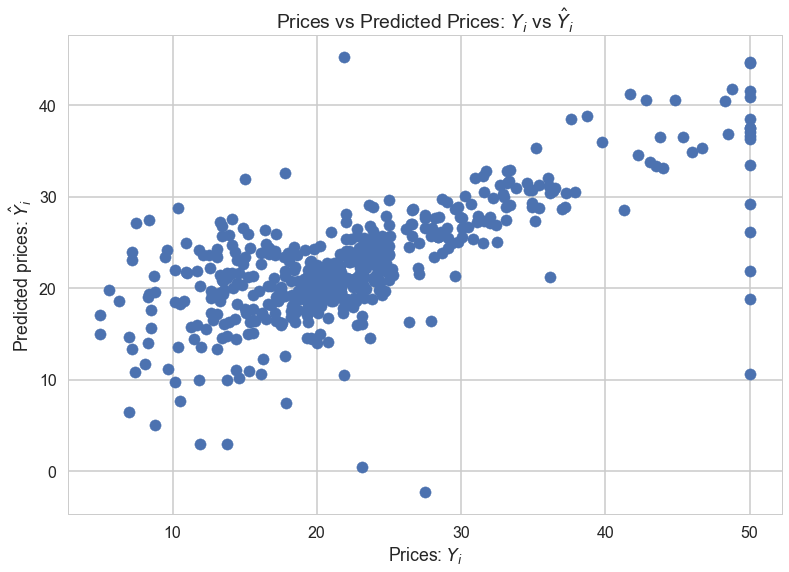

In [24]:
plt.scatter(bos['PRICE'], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

# Fitting Linear Regression using sklearn

In [25]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# What can we do with a linear regression model

In [27]:
# Look inside linear regression object
# LinearRegression.<tab>

 Main functions	     Description
1. lm.fit():-	         Fit a linear model
2. lm.predit():-	     Predict Y using the linear model with estimated coefficients
3. lm.score():-	     Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model

In [29]:
#Look inside lm object                                                                                                          
#lm.<tab>

Output   :--          	Description 

lm.coef_	:--         Estimated coefficients

lm.intercept_	:--     Estimated intercept

#fit a linear model

The lm.fit() function estimates the coefficients the linear regression using least squares.

In [30]:
#Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

# your turn
# notice fit_intercept=True and normalize=True
# How would you change the model to not fit an intercept term?

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using lm.intercept_ and lm.coef_

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$:

In [31]:
print 'Estimated intercept coefficient:', lm.intercept_

Estimated intercept coefficient: 36.4911032804


In [32]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


# Predict Prices

We can calculate the predicted prices ($\hat{Y}_i$) using lm.predict.

In [35]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

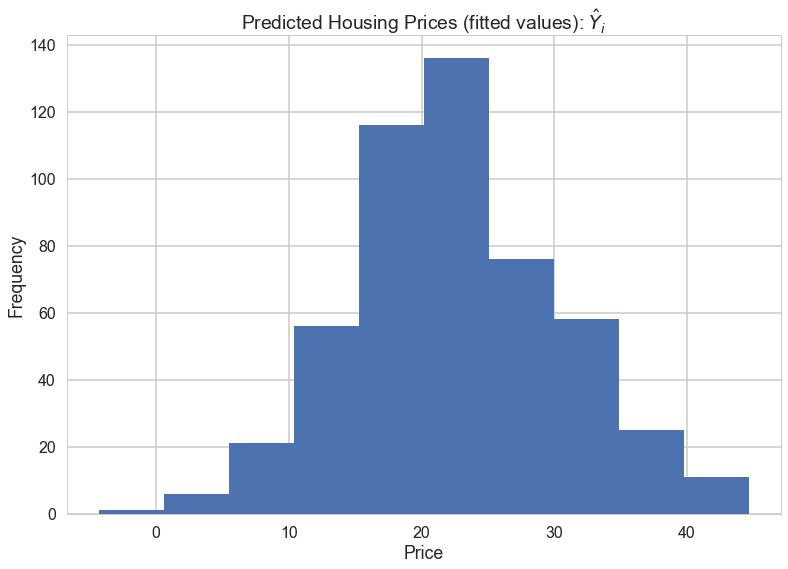

In [36]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

Let's plot the true prices compared to the predicted prices to see they disagree, we saw this exactly before but this is how you access the predicted values in using sklearn.

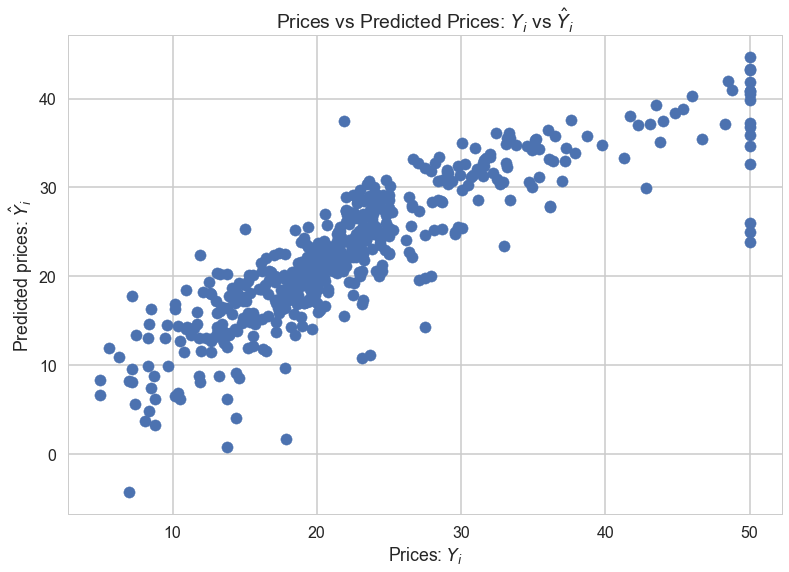

In [37]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

# Residual Sum of squares

Let's calculate the residual sum of squares

In [39]:
print np.sum((bos.PRICE - lm.predict(X)) ** 2)

11080.2762841


# Mean Squared Error

In [41]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print mseFull

21.8977792177


# Relationship between PTRATIO and housing price

Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town)

Calculate the mean squared error.

In [42]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print msePTRATIO

62.6522000138


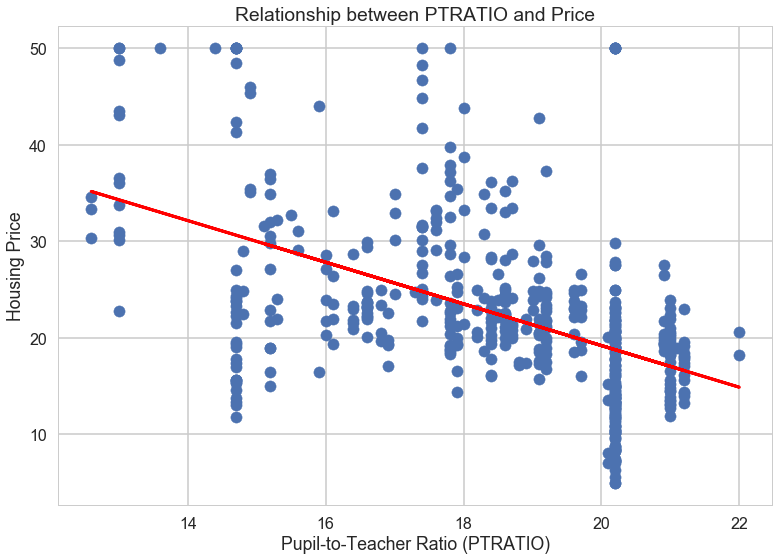

In [45]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='red', linewidth=3)
plt.show()

# Training And test Data Sets

In [59]:
X_train = X[:-50]
print pd.DataFrame(X_train)
X_test = X[-50:]
print pd.DataFrame(X_test)
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

Another way, is to split the data into random train and test subsets using the function train_test_split in sklearn.cross_validation

#let's look at the function in the help file 

#sklearn.cross_validation.train_test_split?

In [48]:
#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)
#print X_train.shape
#print X_test.shape
#print Y_train.shape
#print Y_test.shape

In [60]:
lm = LinearRegression
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

TypeError: unbound method fit() must be called with LinearRegression instance as first argument (got DataFrame instance instead)

________________________________________________________________________________________________________________________________

In [61]:
faithful = sm.datasets.get_rdataset("faithful")

In [62]:
# Let's look at the help file
sm.datasets.get_rdataset?
faithful?

In [63]:
faithful.title

'Old Faithful Geyser Data'

In [64]:
faithful = faithful.data
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [65]:
faithful.shape

(272, 2)

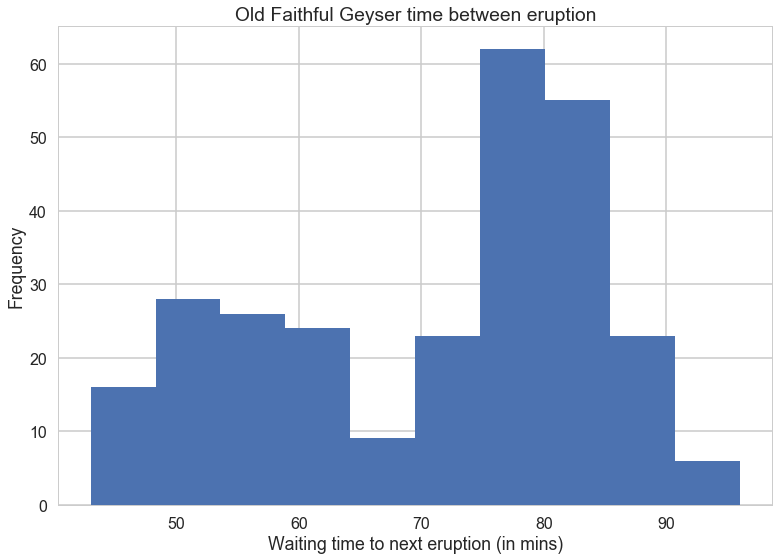

In [66]:
plt.hist(faithful.waiting)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Frequency')
plt.title('Old Faithful Geyser time between eruption')
plt.show()

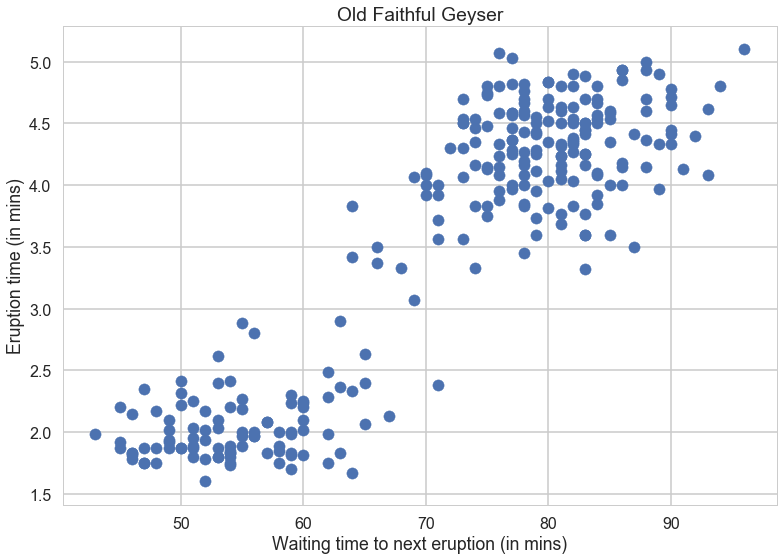

In [67]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')
plt.show()

In [68]:
X = faithful.waiting
y = faithful.eruptions
model = sm.OLS(y, X)

In [69]:
results = model.fit()

In [70]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     9621.
Date:                Thu, 05 Oct 2017   Prob (F-statistic):          9.97e-214
Time:                        18:07:26   Log-Likelihood:                -250.30
No. Observations:                 272   AIC:                             502.6
Df Residuals:                     271   BIC:                             506.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waiting        0.0501      0.001     98.086      0.0

In [71]:
results.params.values

array([ 0.05012919])

We notice, there is no intercept ($\beta_0$) fit in this linear model. To add it, we can use the function sm.add_constant

In [72]:
X = sm.add_constant(X)
X.head()

,const,waiting
0,1.0,79
1,1.0,54
2,1.0,74
3,1.0,62
4,1.0,85


Now let's fit a linear regression model with an intercept.

In [76]:
modelW0 = sm.OLS(y, X)
resultsW0 = modelW0.fit()
print resultsW0.summary()

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 05 Oct 2017   Prob (F-statistic):          8.13e-100
Time:                        18:11:52   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

In [77]:
newX = np.array([1,75])
resultsW0.params[0]*newX[0] + resultsW0.params[1] * newX[1]

3.7980801099789669

In [78]:
resultsW0.predict(newX)

array([ 3.79808011])

Based on this linear regression, if the waiting time since the last eruption has been 75 minutes, we expect the next one to last approximately 3.80 minutes.

# Plot the regression line
Instead of using resultsW0.predict(X), we can use resultsw0.fittedvalues which are the $\hat{y}$

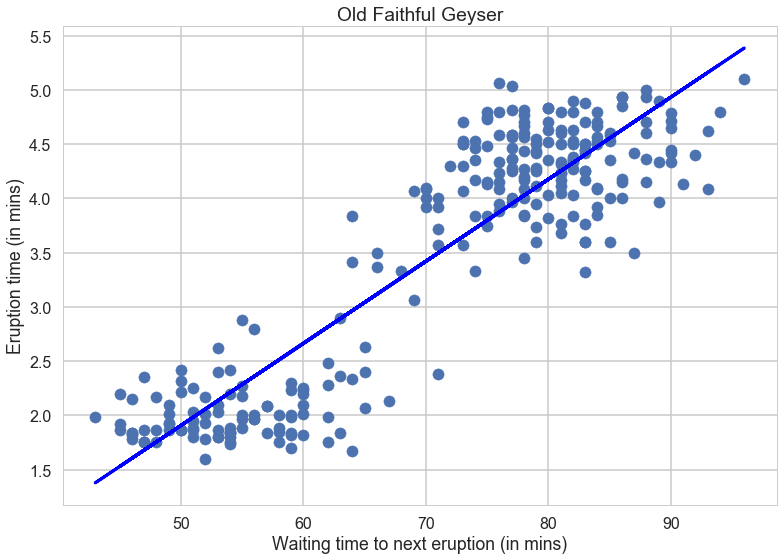

In [79]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(faithful.waiting, resultsW0.fittedvalues, color='blue', linewidth=3)
plt.show()

In [80]:
resids = faithful.eruptions - resultsW0.predict(X)

In [81]:
resids = resultsW0.resid

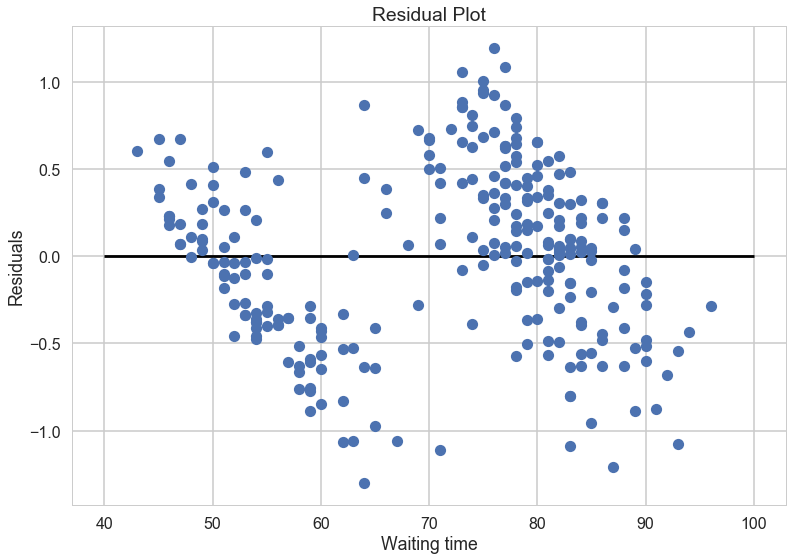

In [82]:
plt.plot(faithful.waiting, resids, 'o')
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [83]:
#residual sum of squares
print np.sum((faithful.eruptions - resultsW0.predict(X)) ** 2)

66.5617757127


In [84]:
#mean squared error
print np.mean((faithful.eruptions - resultsW0.predict(X)) ** 2)

0.244712410708


In [85]:
#least squares

In [86]:
X = sm.add_constant(faithful.waiting)
y = faithful.eruptions

First, compute $X^{\top}X$

In [87]:
np.dot(X.T, X)

array([[  2.72000000e+02,   1.92840000e+04],
       [  1.92840000e+04,   1.41726600e+06]])

Next, compute the inverse of $X^{\top}X$ or $(X^{\top}X)^{-1}$

In [88]:
np.linalg.inv(np.dot(X.T, X))

array([[  1.04029479e-01,  -1.41547492e-03],
       [ -1.41547492e-03,   1.99652136e-05]])

Finally, compute $\hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $

In [89]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print "Directly estimating beta:", beta
print "Estimating beta using statmodels: ", resultsW0.params.values

Directly estimating beta: [-1.87401599  0.07562795]
Estimating beta using statmodels:  [-1.87401599  0.07562795]


# LOGISTIC REGRESSION

Logistic regression is a probabilistic model that links observed binary data to a set of features.

Suppose that we have a set of binary (that is, taking the values 0 or 1) observations $Y_1,\cdots,Y_n$, and for each observation $Y_i$ we have a vector of features $X_i$. The logistic regression model assumes that there is some set of **weights**, **coefficients**, or **parameters** $\beta$, one for each feature, so that the data were generated by flipping a weighted coin whose probability of giving a 1 is given by the following equation:

$$
P(Y_i = 1) = \mathrm{logistic}(\sum \beta_i X_i),
$$

where

$$
\mathrm{logistic}(x) = \frac{e^x}{1+e^x}.
$$

When we *fit* a logistic regression model, we determine values for each $\beta$ that allows the model to best fit the *training data* we have observed. Once we do this, we can use these coefficients to make predictions about data we have not yet observed.

In [90]:
from IPython.display import Image as Im
from IPython.display import display
Im('./images/shuttle.png')

In [91]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("D:\Machine Learning/chall.txt")])
data

array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

In [92]:
# fit logistic regression model
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

# statsmodels works nicely with pandas dataframes
dat = pd.DataFrame(data, columns = ['Temperature', 'Failure'])
logit_model = logit('Failure ~ Temperature',dat).fit()
print logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Oct 2017   Pseudo R-squ.:                  0.2813
Time:                        18:43:03   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041       0.581      29.505
Temperature    -0.2322    

In [93]:
dat

,Temperature,Failure
0,66.0,0.0
1,70.0,1.0
2,69.0,0.0
3,68.0,0.0
4,67.0,0.0
5,72.0,0.0
6,73.0,0.0
7,70.0,0.0
8,57.0,1.0
9,63.0,1.0


In [97]:
# calculate predicted failure probabilities for new termperatures
x = np.linspace(50, 85, 1000)
print x
p = logit_model.params
print p
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta)/(1 + np.exp(eta))

[ 50.          50.03503504  50.07007007  50.10510511  50.14014014
  50.17517518  50.21021021  50.24524525  50.28028028  50.31531532
  50.35035035  50.38538539  50.42042042  50.45545546  50.49049049
  50.52552553  50.56056056  50.5955956   50.63063063  50.66566567
  50.7007007   50.73573574  50.77077077  50.80580581  50.84084084
  50.87587588  50.91091091  50.94594595  50.98098098  51.01601602
  51.05105105  51.08608609  51.12112112  51.15615616  51.19119119
  51.22622623  51.26126126  51.2962963   51.33133133  51.36636637
  51.4014014   51.43643644  51.47147147  51.50650651  51.54154154
  51.57657658  51.61161161  51.64664665  51.68168168  51.71671672
  51.75175175  51.78678679  51.82182182  51.85685686  51.89189189
  51.92692693  51.96196196  51.996997    52.03203203  52.06706707
  52.1021021   52.13713714  52.17217217  52.20720721  52.24224224
  52.27727728  52.31231231  52.34734735  52.38238238  52.41741742
  52.45245245  52.48748749  52.52252252  52.55755756  52.59259259
  52.62762

(-0.1, 1.1)

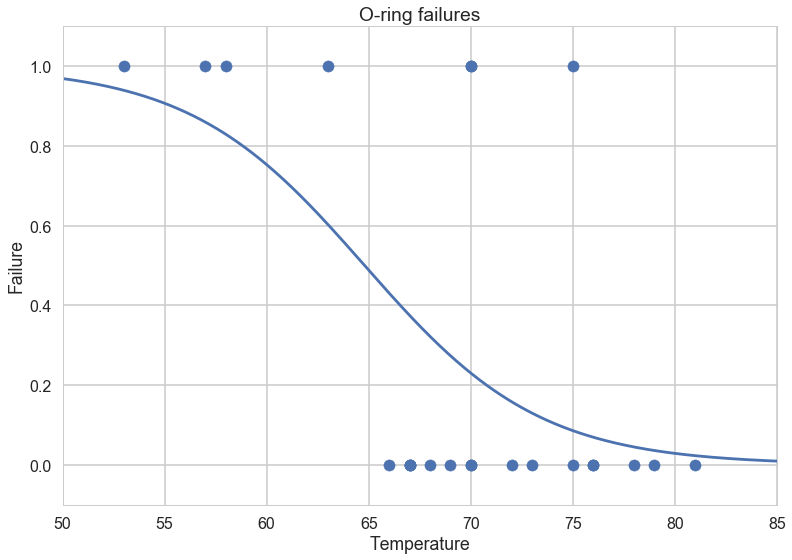

In [102]:
# plot data
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

In [100]:
print y

[ 0.96877352  0.96852652  0.96827763  0.96802684  0.96777413  0.96751949
  0.9672629   0.96700436  0.96674385  0.96648135  0.96621685  0.96595034
  0.9656818   0.96541122  0.96513858  0.96486387  0.96458707  0.96430818
  0.96402717  0.96374403  0.96345875  0.96317131  0.96288169  0.96258989
  0.96229588  0.96199965  0.96170119  0.96140047  0.96109749  0.96079223
  0.96048468  0.96017481  0.95986261  0.95954807  0.95923117  0.95891189
  0.95859022  0.95826614  0.95793963  0.95761069  0.95727928  0.95694541
  0.95660904  0.95627016  0.95592876  0.95558481  0.95523831  0.95488923
  0.95453756  0.95418328  0.95382638  0.95346682  0.95310461  0.95273972
  0.95237212  0.95200182  0.95162878  0.95125299  0.95087443  0.95049308
  0.95010893  0.94972196  0.94933214  0.94893947  0.94854391  0.94814546
  0.9477441   0.9473398   0.94693254  0.94652232  0.9461091   0.94569288
  0.94527363  0.94485132  0.94442596  0.9439975   0.94356594  0.94313125
  0.94269342  0.94225243  0.94180825  0.94136086  0